<a href="https://colab.research.google.com/github/Tejaswidarsi/ML-5/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imported Required Libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

###a. Load the Dataset

In [44]:
data = load_iris()
X, y = data.data, data.target

## Dataset Overview
The Iris dataset contains three classes of flowers:
- Setosa
- Versicolor
- Virginica

In [87]:
x = data['data'][:, :4]  # Get all rows and the first 4 columns (features)
y = data['target']
print(x[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


###b.Split the dataset into training and testing sets

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

**Standardize the dataset**

In [67]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

**Fit a K-Nearest Neighbors classifier**

In [89]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

## Evaluating the KNN Model with Different Values of k

In this section, we will evaluate the performance of the KNN classifier for different values of k, ranging from 1 to 20. We will:

1. Train the KNN classifier for each value of k.
2. Measure the accuracy for each k.
3. Print the accuracy and confusion matrix for k=3.
4. Plot the relationship between k and accuracy to find the optimal value of k.


In [86]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    if k == 3:  # Example for k = 3
        print(f"Accuracy for k=3: {accuracy:.2f}")
        print(f"Confusion Matrix for k=3:\n{confusion_matrix(y_test, y_pred)}")

Accuracy for k=3: 1.00
Confusion Matrix for k=3:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [81]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


###d. Examining the effect of the value of K on accuracy
k_values = range(1, 21)

###Plotting the curve: K vs Accuracy

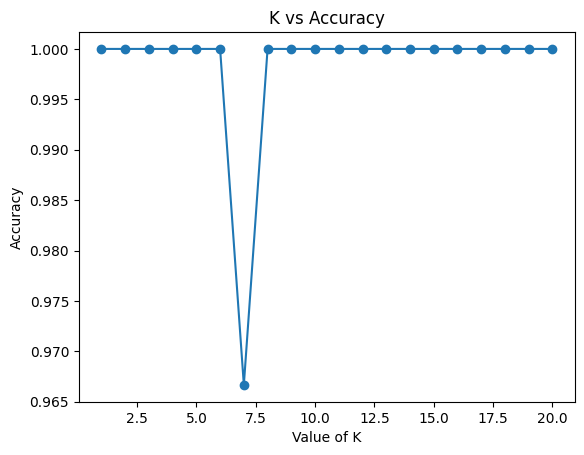

In [84]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()


###Finding the value of K with the maximum accuracy


In [85]:
best_k = k_values[np.argmax(accuracies)]
print(f'Best value of k: {best_k}, Maximum Accuracy: {max(accuracies):.2f}')

Best value of k: 1, Maximum Accuracy: 1.00
